In [1]:
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
from matplotlib.colors import ListedColormap


# Import danych

In [12]:
train_file_path = "../data/data3.txt"
max_iter_count = 1000
classes = [1,2]

train_data = np.genfromtxt(train_file_path,  delimiter="  ", skip_header=1, dtype=np.float128)
# Replace classes with 1 and -1
train_data[:,0][train_data[:,0]==classes[0]]=1
train_data[:,0][train_data[:,0]==classes[1]]=-1
#swap columns first and last columns
train_data[:, 0], train_data[:, -1] = train_data[:, -1], train_data[:, 0].copy()
train_data

ValueError: Some errors were detected !
    Line #13 (got 1 columns instead of 2)
    Line #14 (got 1 columns instead of 2)
    Line #15 (got 1 columns instead of 2)

# Dane 


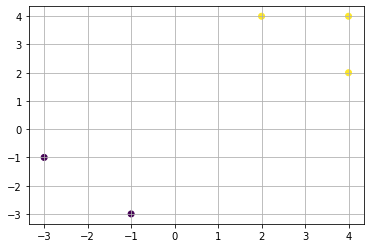

In [3]:
plt.scatter(train_data[:,0],train_data[:,1],c=train_data[:,2])
plt.grid()

# Algorytm

In [4]:
def discrimiantion_fucntion(data,current_v):
    return np.inner(data,current_v[:-1])+current_v[-1]

def classify(data, current_v):
    discrimiation_fucntion_value = discrimiantion_fucntion(data,current_v)
    if discrimiation_fucntion_value>0:
        return 1
    return -1

def error_count(data,current_v):
    expected_value = data[:,-1] # 1 -1
    actual_values = np.array([classify(data_row[:-1],current_v) for data_row in data])
    return np.sum(expected_value!=actual_values)

In [5]:
v = np.zeros(train_data.shape[1])
best_v = np.zeros(train_data.shape[1])
best_error_count = np.Inf # lower better
no_train_count = 0
for index, train_row in enumerate(cycle(train_data)):
    if no_train_count>4 or index>max_iter_count:
        break
    
    product = np.inner(train_row,v)
    if product<=0:
        v+=train_row
        no_train_count=0
    else:
        no_train_count +=1
    
    current_error_count = error_count(train_data, v)
    if current_error_count<best_error_count:
        best_error_count = current_error_count
        best_v = v.copy()
    print(f"Iteration {index} v = {v} current_error_count={current_error_count}")



Iteration 0 v = [4. 2. 1.] current_error_count=0
Iteration 1 v = [4. 2. 1.] current_error_count=0
Iteration 2 v = [4. 2. 1.] current_error_count=0
Iteration 3 v = [1. 1. 0.] current_error_count=0
Iteration 4 v = [ 0. -2. -1.] current_error_count=5
Iteration 5 v = [4. 0. 0.] current_error_count=0
Iteration 6 v = [4. 0. 0.] current_error_count=0
Iteration 7 v = [4. 0. 0.] current_error_count=0
Iteration 8 v = [ 1. -1. -1.] current_error_count=3
Iteration 9 v = [ 1. -1. -1.] current_error_count=3
Iteration 10 v = [ 1. -1. -1.] current_error_count=3
Iteration 11 v = [3. 3. 0.] current_error_count=0
Iteration 12 v = [3. 3. 0.] current_error_count=0
Iteration 13 v = [ 0.  2. -1.] current_error_count=0
Iteration 14 v = [-1. -1. -2.] current_error_count=5
Iteration 15 v = [ 3.  1. -1.] current_error_count=0
Iteration 16 v = [ 3.  1. -1.] current_error_count=0
Iteration 17 v = [ 3.  1. -1.] current_error_count=0
Iteration 18 v = [ 0.  0. -2.] current_error_count=3
Iteration 19 v = [ 0.  0. -2.]

In [6]:
@np.vectorize
def discrimination_func(x,y):
    return v[0]*x+v[1]*y+v[2]
x = np.linspace(np.min(train_data)*1.3, np.max(train_data)*1.3, 1000)
X,Y = np.meshgrid(x,x)
X = X.T
Y = Y.T
Z = discrimination_func(X, Y)
Z

array([[-25.6       , -25.58178178, -25.56356356, ...,  -7.43643644,
         -7.41821822,  -7.4       ],
       [-25.58178178, -25.56356356, -25.54534535, ...,  -7.41821822,
         -7.4       ,  -7.38178178],
       [-25.56356356, -25.54534535, -25.52712713, ...,  -7.4       ,
         -7.38178178,  -7.36356356],
       ...,
       [ -7.43643644,  -7.41821822,  -7.4       , ...,  10.72712713,
         10.74534535,  10.76356356],
       [ -7.41821822,  -7.4       ,  -7.38178178, ...,  10.74534535,
         10.76356356,  10.78178178],
       [ -7.4       ,  -7.38178178,  -7.36356356, ...,  10.76356356,
         10.78178178,  10.8       ]], dtype=float128)

No handles with labels found to put in legend.


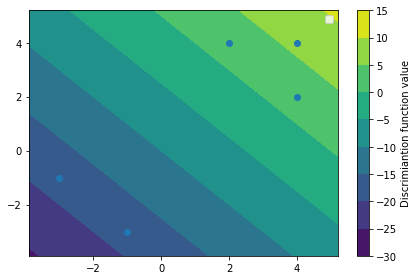

In [7]:
h= plt.contourf(x, x, Z)
markers = np.array(train_data[:,2]+2, dtype=np.int64).astype(str)
plt.scatter(train_data[:,0],train_data[:,1])
plt.colorbar(h, label="Discrimiantion function value")
plt.legend()
plt.tight_layout()

In [8]:

markers

array(['3', '3', '3', '1', '1'], dtype='<U21')

In [9]:
t = np.linspace(np.min(train_data), np.max(train_data), 1024)
t

array([-3.        , -2.99315738, -2.98631476, ...,  3.98631476,
        3.99315738,  4.        ], dtype=float128)

In [10]:
np.maximum()

ValueError: invalid number of arguments

In [ ]:
for data in train_data:
    result = classify([3,3], v)
    print(result)

In [ ]:
np.dot(train_data[0],v)

In [ ]:
train_data.shape